In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

How many most common words to print: 40

Cool! The 40 most common words are as follows

a :  12
the :  12
and :  9
he :  7
blues :  7
i :  6
that :  6
to :  5
on :  5
tune :  4
 :  4
weary :  4
his :  4
got :  4
did :  3
with :  3
ain't :  3
ma :  3
thump :  3
went :  3
heard :  2
negro :  2
night :  2
old :  2
lazy :  2
sway :  2
piano :  2
o :  2
played :  2
like :  2
in :  2
nobody :  2
can't :  2
be :  2
droning :  1
drowsy :  1
syncopated :  1
rocking :  1
back :  1
forth :  1


<AxesSubplot:xlabel='Word'>

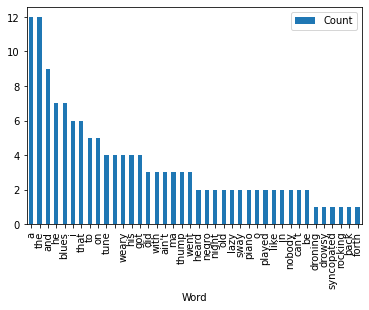

In [2]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('langston_text.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('langston_text.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nCool! The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')